In [1]:
import sympy
sympy.init_printing()

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
t, s = sympy.symbols('t, s')
a = sympy.symbols('a', real=True, positive=True)

In [4]:
f = sympy.exp(-a*t)
f

In [5]:
# transform manually
sympy.integrate(f*sympy.exp(-s*t), (t, 0, sympy.oo))

⎧       1                                          π
⎪   ─────────      for │periodic_argument(s, ∞)│ ≤ ─
⎪     ⎛a    ⎞                                      2
⎪   s⋅⎜─ + 1⎟                                       
⎪     ⎝s    ⎠                                       
⎪                                                   
⎨∞                                                  
⎪⌠                                                  
⎪⎮  -a⋅t  -s⋅t                                      
⎪⎮ ℯ    ⋅ℯ     dt              otherwise            
⎪⌡                                                  
⎪0                                                  
⎩                                                   

In [6]:
sympy.laplace_transform(f, t, s)

(1/(a + s), 0, True)

In [7]:
F = sympy.laplace_transform(f, t, s, noconds=True)
F

In [8]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)

def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [9]:
F = L(f)
F

In [10]:
invL(F)


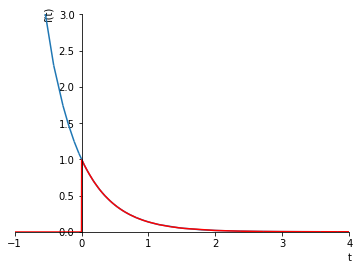

In [11]:
p = sympy.plot(f.subs({a: 2}), invL(F).subs({a: 2}),
               xlim=(-1, 4), ylim=(0, 3), show=False)
p[1].line_color = 'red'
p.show()

In [12]:
sympy.Heaviside(t)

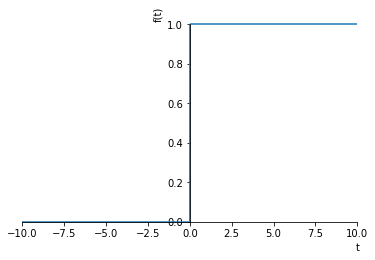

In [13]:
sympy.plot(sympy.Heaviside(t))

In [14]:
omega = sympy.Symbol('omega', real=True)
exp = sympy.exp
sin = sympy.sin
cos = sympy.cos
functions = [1,
         t,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t),
         1 - exp(-a*t),
         exp(-a*t)*sin(omega*t),
         exp(-a*t)*cos(omega*t),
         ]
functions


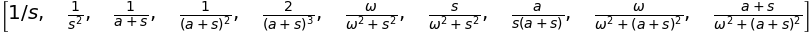

In [15]:
Fs = [L(f) for f in functions]
Fs

In [16]:
sympy.latex(f)

'e^{- a t}'

In [19]:
from pandas import DataFrame

def makelatex(args):
    return ["$${}$$".format(sympy.latex(a)) for a in args]

list(zip(makelatex(functions), makelatex(Fs)))
DataFrame(list(zip(makelatex(functions), makelatex(Fs))))

,0,1
0,$$1$$,$$\frac{1}{s}$$
1,$$t$$,$$\frac{1}{s^{2}}$$
2,$$e^{- a t}$$,$$\frac{1}{a + s}$$
3,$$t e^{- a t}$$,$$\frac{1}{\left(a + s\right)^{2}}$$
4,$$t^{2} e^{- a t}$$,$$\frac{2}{\left(a + s\right)^{3}}$$
5,$$\sin{\left (\omega t \right )}$$,$$\frac{\omega}{\omega^{2} + s^{2}}$$
6,$$\cos{\left (\omega t \right )}$$,$$\frac{s}{\omega^{2} + s^{2}}$$
7,$$1 - e^{- a t}$$,$$\frac{a}{s \left(a + s\right)}$$
8,$$e^{- a t} \sin{\left (\omega t \right )}$$,$$\frac{\omega}{\omega^{2} + \left(a + s\right...
9,$$e^{- a t} \cos{\left (\omega t \right )}$$,$$\frac{a + s}{\omega^{2} + \left(a + s\right)...
